## Homework 7| Problem 1: Solitons

Now we can study the soliton wave.  It is described by the Korteweg–de Vries equation

\begin{equation}
\frac{\partial U}{\partial t} + \epsilon U\frac{\partial U}{\partial x} + \mu \frac{\partial^3 U}{\partial x^3}= 0.
\end{equation}

The only thing new is that we need the difference form for the third derivative

\begin{equation}
\frac{\partial^3 f}{\partial x^3}=\frac{f_{i+2} - 2f_{i+1} + 2f_{i-1} - f_{i-2}}{2\Delta x^3}.
\end{equation}

Now, implement a code that solves the Korteweg–de Vries equation with an initial Gaussian profile as above.
Assume first that $\epsilon = 0.2$ and $\mu = 0.1$.

Can you use the same CFL condition as above?
Why or why not?
(Hint: What does the von Neumann stability analysis tell you?)

Once you are happy with your implementation, explore different values of $\epsilon$ and $\mu$.
What do they do?

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.003999999999892
t =  6.003999999999782
t =  7.003999999999672
t =  8.003999999999563
t =  9.003999999999452
t =  10.003999999999342
Done.


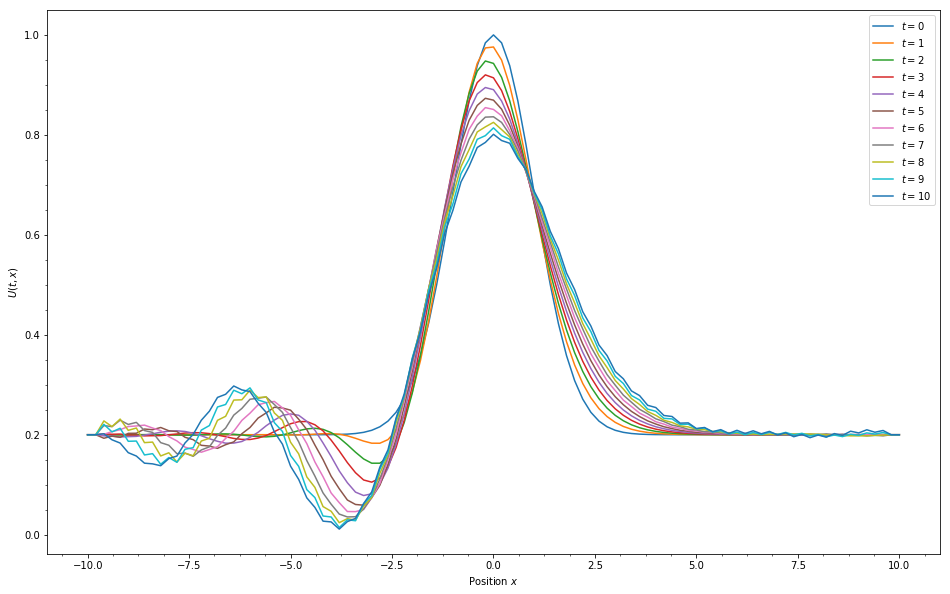

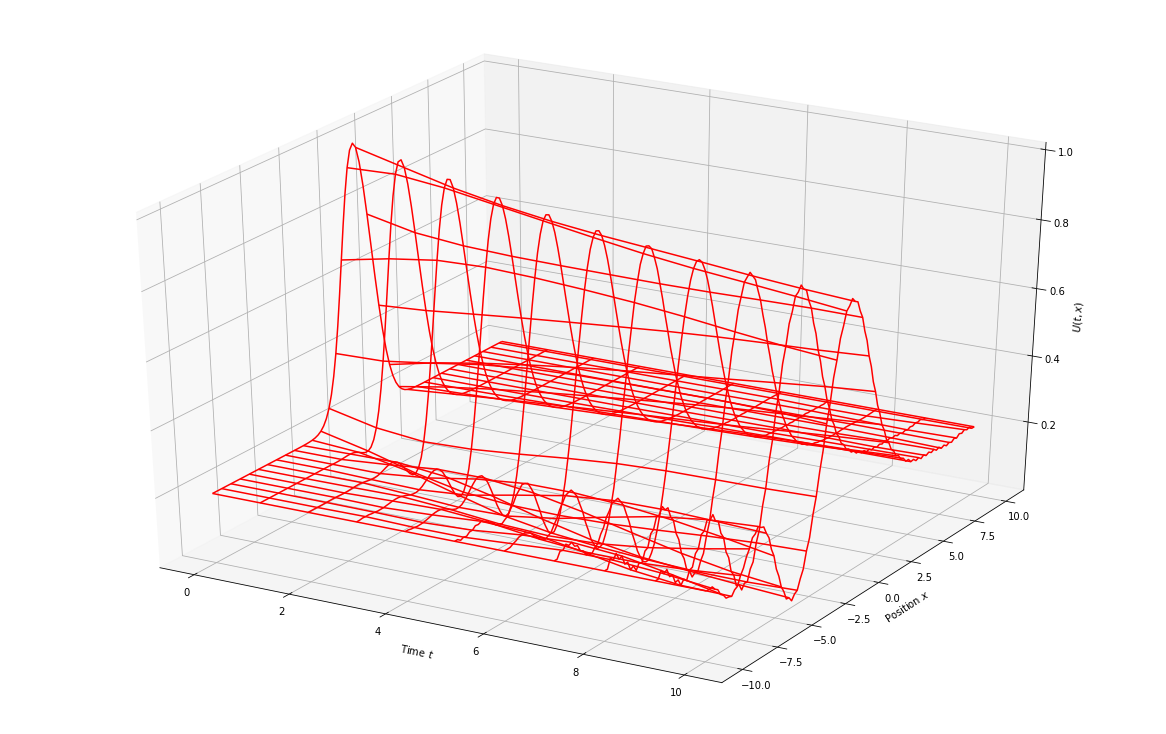

In [5]:
# Korteweg-de Vries Equation

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#New Coefficients
e = 0.2
u = 0.1

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.02 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(2, Nx-2):
        U[ix] = Uold[ix] - e*Uold[ix]*dt*(Uold[ix] - Uold[ix-1])/dx - u*dt*(Uold[ix+2]-2*Uold[ix+1]+2*Uold[ix-1]-Uold[ix-2])/2/dx/dx/dx # Here lies the main differences between the previous burger code and the homework code, as can be observed, the limits of calculation have to be modified in order for the calculation to remain in range.
        pass
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Above I have shown the generic code for the given soliton equation with e = 0.2 and u = 0.1. The CFL condition cannot be the same as before yielding unwieldy results. Instead i've found that as an upperbound dt/dx = 0.02 yields results close to what we would expect. 

Below are the results of this problem with different values of e and u hoping to reach a constant profile across all t.

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.003999999999892
t =  6.003999999999782
t =  7.003999999999672
t =  8.003999999999563
t =  9.003999999999452
t =  10.003999999999342
Done.


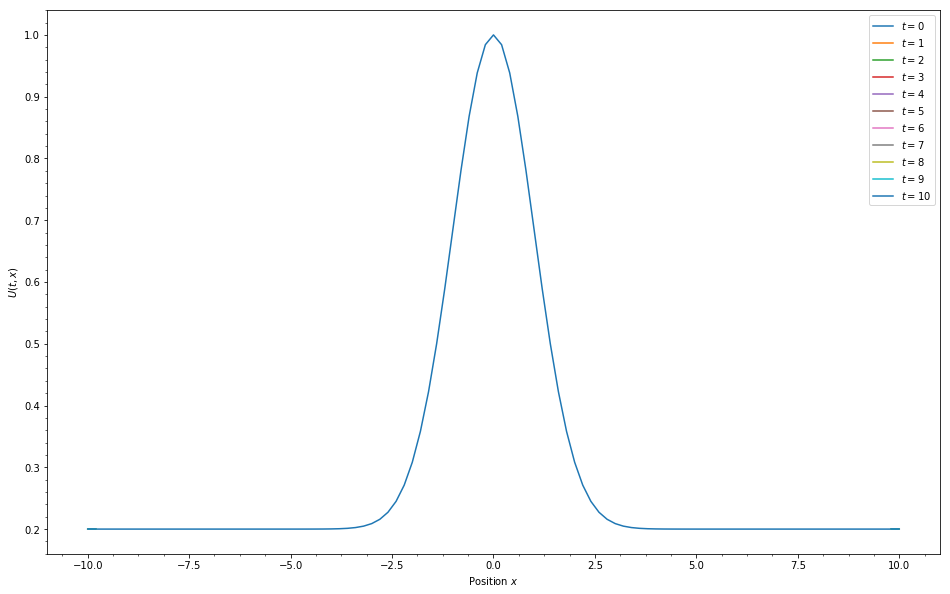

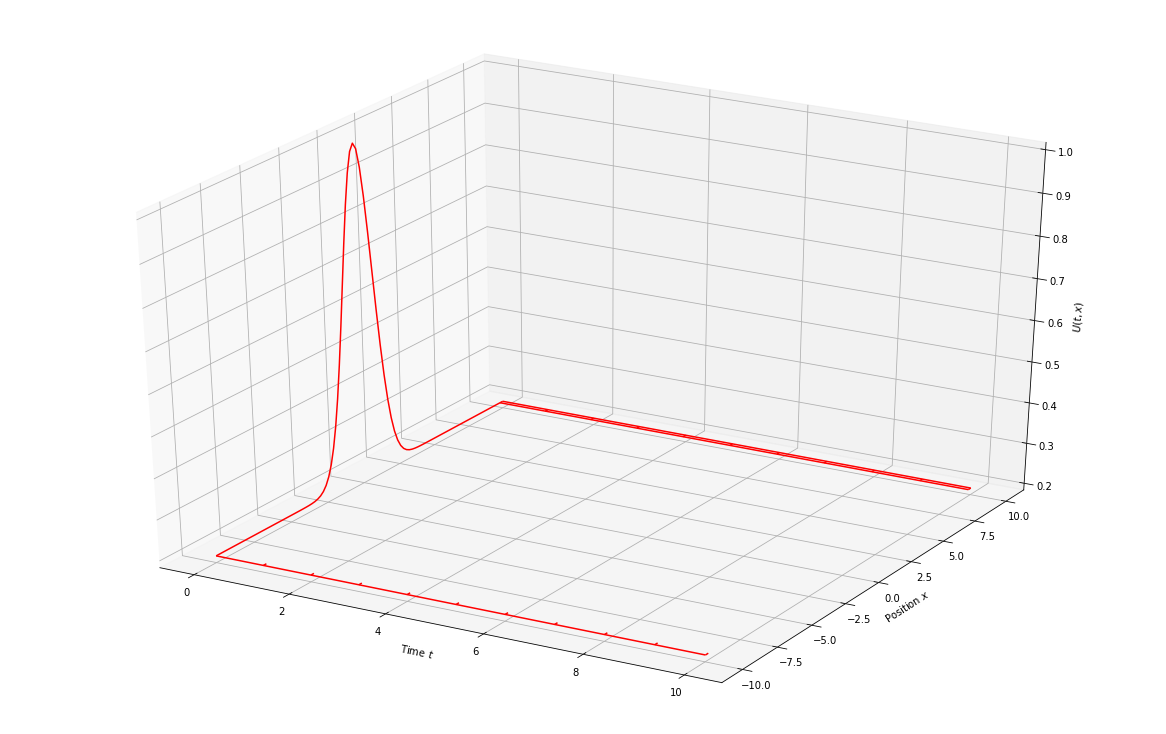

In [6]:
# Korteweg-de Vries Equation

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#New Coefficients
e = 0.2
u = 0.5

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.02 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(2, Nx-2):
        U[ix] = Uold[ix] - e*Uold[ix]*dt*(Uold[ix] - Uold[ix-1])/dx - u*dt*(Uold[ix+2]-2*Uold[ix+1]+2*Uold[ix-1]-Uold[ix-2])/2/dx/dx/dx
        pass
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

In the code above, I've let the magnitude of the third derivative term (u) be larger than the magnitude of the first derivative term (e). As can be seen from above, the program encounters errors, suggesting that the CFL condition is dependent on e and u.

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.003999999999892
t =  6.003999999999782
t =  7.003999999999672
t =  8.003999999999563
t =  9.003999999999452
t =  10.003999999999342
Done.


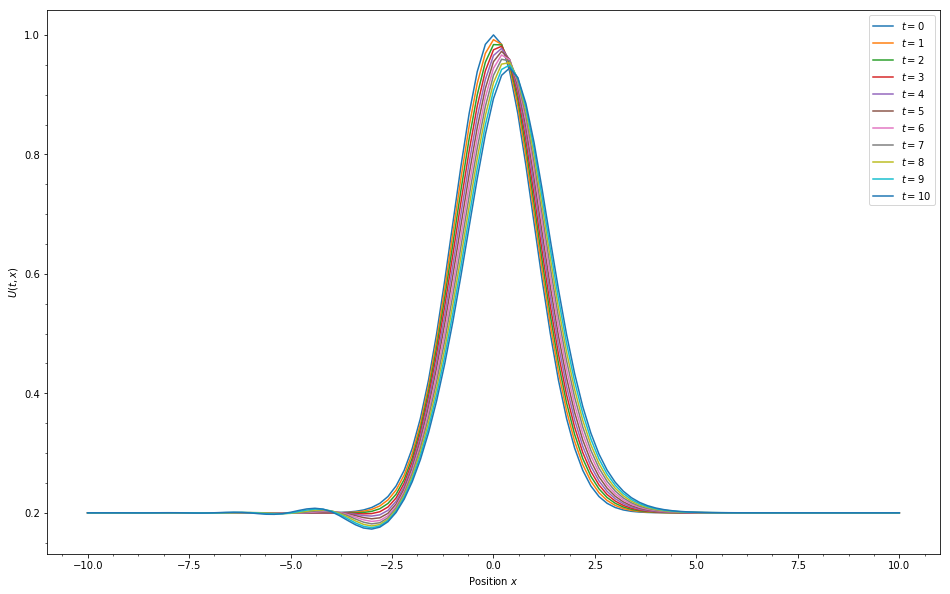

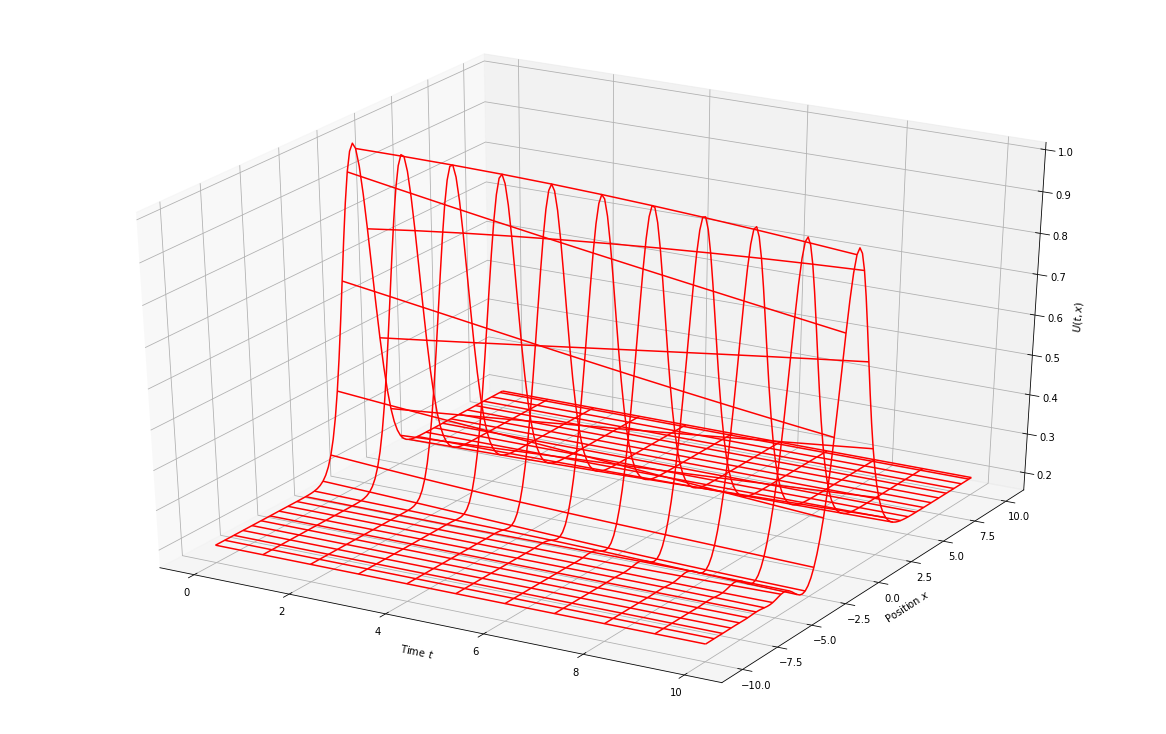

In [7]:
# Korteweg-de Vries Equation

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#New Coefficients
e = 0.1
u = 0.1/6

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.02 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(2, Nx-2):
        U[ix] = Uold[ix] - e*Uold[ix]*dt*(Uold[ix] - Uold[ix-1])/dx - u*dt*(Uold[ix+2]-2*Uold[ix+1]+2*Uold[ix-1]-Uold[ix-2])/2/dx/dx/dx
        pass
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Above I have demonstrated the same solution to the code except now the third derivative term is 6 times smaller than the first derivative term (e/u = 6). This generates a soliton solution that is very close to what we would desire; i.e., a wave whose magnitude is constant in time. 